In [1]:
import os, sys

import IPython.display as ipd

path= '/Users/sbielfel/Nextcloud2/time_resolved/'
sys.path.append(path)
path= '/Users/sbielfel/Nextcloud2/phase_retrieval/algos/'
sys.path.append(path)
%load_ext autoreload
%autoreload 2

In [2]:
print(sys.executable)

/Users/sbielfel/anaconda3/envs/fml/bin/python


In [3]:
# import h5py
import meteor
import reciprocalspaceship as rs
import numpy as np
import gemmi 
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter
# from output_eval import *

In [4]:
from occupancy import *
from plotting3d import *

In [5]:
%matplotlib ipympl

In [6]:
variant = "basic"
noise_level=0
plotfolder = "./plots/"

# Remarks
Rework of previous dataset. The analysis is highly similar compared to the other notebook. I created gifs for the more important 3d plots. There are no major surprises compared to the other notebook (anymore).

In [13]:

dataloc = "../synthetic_cistrans/"
variant = "basic"
match variant:
    case "basic":
        name_dark = "trans_sf.mtz"
        name_light = "100ps_sf.mtz"
        alpha = 0.27
    case "basic-alt":
        name_dark = "trans_sf.mtz"
        name_light = "100ps_sfV2.mtz"
        alpha = 0.27
    case "noise":
        name_light = "100ps_withSIGFC_amplitudenoise.mtz"
        name_dark = "trans_withSIGFC_amplitudenoise.mtz"
        alpha = 0.27
ds_light = rs.read_mtz(dataloc+name_light)
ds_dark = rs.read_mtz(dataloc+name_dark)

In [91]:
ds_dark["sf"] = ds_dark.to_structurefactor("FC", "PHIC")
f_dark = ds_dark.to_reciprocal_grid("sf")
ds_light["sf"] = ds_light.to_structurefactor("FC", "PHIC")
f_light = ds_light.to_reciprocal_grid("sf")
delta_fa_abs = np.abs(f_light)-np.abs(f_dark)

In [9]:
pdbname_light = dataloc+"100ps.pdb"
struc_light = gemmi.read_structure(pdbname_light)
pdbname_dark = dataloc + "trans.pdb"
struc_dark = gemmi.read_structure(pdbname_dark)

pos_list = np.array([(rca.atom.pos).tolist()   for rca in struc_light[0].all()])
for idx in range(3):
    diff = np.max(pos_list[:,idx])-np.min(pos_list[:,idx])


In [88]:

dataloc = "../X8_runs/"
variant = "low"
variant = "high"
variant = "zero"
variant = "high26"
variant = "medium"
variant = "medium66"
variant = "medium10"
variant = "medium26"
match variant:
    case "zero":
        dataloc+="synth_runs/_28/"
        name = 'xx_mqFoFo.mtz'
        alpha = 0.27
        colname = "QFEXTRFCWT"
        colname =  "QFOFOWT"
    case "little":
        dataloc+="low_noise/_1/"
        name = 'xx_mqFoFo.mtz'
        alpha = 0.27
        colname =  "QFOFOWT"
    case "medium":
        dataloc+="noisy_synth/_2/"
        name = 'xx_mqFoFo.mtz'
        colname =  "QFOFOWT"
    case "medium10":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.100/"
        name = 'xx_occ0.100_2mqFextr-DFc_mqFextr-DFc.mtz'
        colname = "QFEXTRFCWT"
    case "medium26":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.260/"
        name = 'xx_occ0.260_2mqFextr-DFc_mqFextr-DFc.mtz'
        colname = "QFEXTRFCWT"
    case "medium66":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.660/"
        name = 'xx_occ0.660_2mqFextr-DFc_mqFextr-DFc.mtz'
        colname = "QFEXTRFCWT"
        
    case "high":
        dataloc+="high_noise/_1/"
        name = 'xx_mqFoFo.mtz'
        colname =  "QFOFOWT"
    case "high26":
        colname = "QFEXTRFCWT"
        dataloc+="high_noise/_1/qweight_occupancy_0.260/"
        name = 'xx_occ0.260_2mqFextr-DFc_mqFextr-DFc.mtz'
ds_diff = rs.read_mtz(dataloc+name)


In [114]:

dataloc = "../X8_runs/"
variant = "medium66"
variant = "medium10"
variant = "medium26"
variant = "medium"
variant = "zero"
variant = "low"
variant = "high"
variant = "high26"
match variant:
    case "zero":
        dataloc+="synth_runs/_28/"
        name = 'xx_mqFoFo.mtz'
        alpha = 0.27
        colname = "QFEXTRFCWT"
        colname =  "QFOFOWT"
    case "low":
        dataloc+="low_noise/_1/"
        name = 'xx_mqFoFo.mtz'
        alpha = 0.27
        colname =  "QFOFOWT"
    case "medium":
        dataloc+="noisy_synth/_2/"
        name = 'xx_mqFoFo.mtz'
        colname =  "QFOFOWT"
    case "medium10":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.100/"
        name = 'xx_occ0.100_qFextr.mtz'
        pcolname = "QFEXTR"
    case "medium26":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.260/"
        name = 'xx_occ0.260_qFextr.mtz'
        pcolname = "QFEXTR"
    case "medium66":
        dataloc+="noisy_synth/_2/qweight_occupancy_0.660/"
        name = 'xx_occ0.660_qFextr.mtz'
        pcolname = "QFEXTR"
        
    case "high":
        dataloc+="high_noise/_1/"
        name = 'xx_mqFoFo.mtz'
        pcolname =  "QFOFOWT"
    case "high26":
        colname = "QFEXTRFCWT"
        dataloc+="high_noise/_1/qweight_occupancy_0.260/"
        name = 'xx_occ0.260_qFextr.mtz'
        pcolname = "QFEXTR"
ds_peak = rs.read_mtz(dataloc+name)


In [115]:
ds_peak

QFEXTR  SIGQFEXTR  FreeR_flag
H  K L                                    
0  0 6   352.769836   1.259997           0
     8   316.266846   1.254286           0
     10  282.794647   1.247023           0
     12  185.184433   1.238351           0
     14  104.746223   1.228552           0
...             ...        ...         ...
32 5 5     1.467582   0.742506           0
   6 0     0.564607   0.377409           0
     1     1.485134   0.750008           1
     2     0.405321   0.171168           1
     3    26.062563   0.253867           0

[25931 rows x 3 columns]

In [109]:
filefrom = dataloc+"alpha_occupancy_determination_qFextr.pdf"
toloc = '/Users/sbielfel/Nextcloud2/time_resolved/tex/figs/'
fileto = toloc + f"x8_occupancy_{variant}.pdf"
#!cp $filefrom $fileto

In [91]:
ds_dark["sf"] = ds_dark.to_structurefactor("FC", "PHIC")
f_dark = ds_dark.to_reciprocal_grid("sf")
ds_light["sf"] = ds_light.to_structurefactor("FC", "PHIC")
f_light = ds_light.to_reciprocal_grid("sf")
delta_fa_abs = np.abs(f_light)-np.abs(f_dark)

In [93]:
# ds_diff["sf"] = ds_diff.to_structurefactor("QFOFOWT", "PHIQFOFOWT")
# ds_diff["sf"] = ds_diff.to_structurefactor("2QFEXTRFCWT", "PHI2QFEXTRFCWT")
ds_diff["sf"] = ds_diff.to_structurefactor(colname, "PHI"+colname)
f_diff = ds_diff.to_reciprocal_grid("sf")
f_diff[np.isnan(f_diff)] = 0
rho_diff = np.fft.ifftn(f_diff)

ds_peak["sf"] = ds_peak.to_structurefactor(pcolname, "PHI"+pcolname)
f_peak = ds_peak.to_reciprocal_grid("sf")
f_peak[np.isnan(f_peak)] = 0
rho_peak = np.fft.ifftn(f_peak)

KeyError: 'PHIQFEXTR'

basically I am just checking that the occupancies are where you promised them to be - and that nothing else occupies this occupancy range.

0.34880389616511454


interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

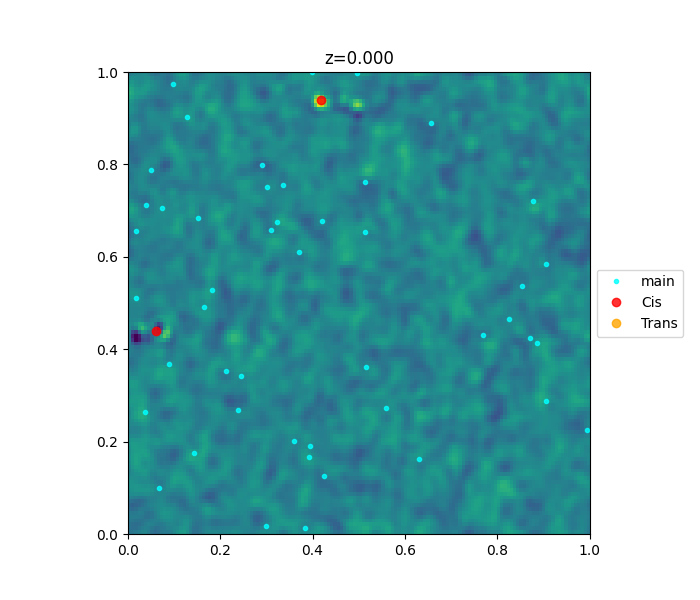

In [80]:

from plotting3d import get_pos_from_pdb
frac_list, occ_mask=get_pos_from_pdb(struc_light, search_occ=0.27)

print(np.max(rho_diff.real))
_ = mtz_comp(frac_list,occ_mask,  np.flip(rho_diff.real,(0,1,2)),extent=[0,1,1,0]) 

interactive(children=(IntSlider(value=0, description='f0', max=99), Output()), _dom_classes=('widget-interact'…

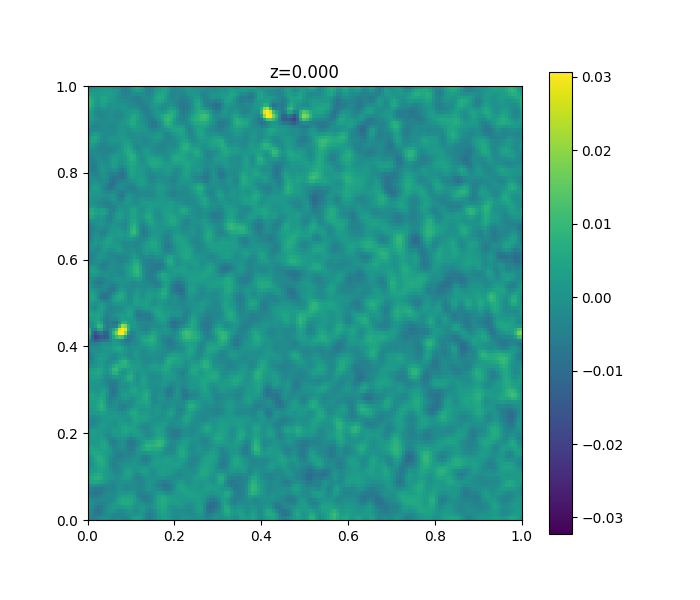

In [31]:
_=slice_3d(rho_diff.real)

In [ ]:
# slice_3d(np.flip(obj1-obj0,(0,1,2))[32:58, 50:76, 65:90])

In [49]:
mtz_path = "../meteor/test/data/scaled-test-data.mtz"
mtz_meteor = rs.read_mtz(mtz_path)
types = [col[2:] for col in mtz_meteor.columns if col[:2] == "F_"]
print(types)
[[col for col in mtz_meteor.columns if tye in col ] for tye in types]
# mtz_meteor.columns

['on', 'off', 'on_scaled', 'off_scaled', 'k', 'TV', 'itTV']


[['F_on', 'SIGF_on', 'F_on_scaled', 'SIGF_on_scaled'],
 ['F_off', 'SIGF_off', 'F_off_scaled', 'SIGF_off_scaled'],
 ['F_on_scaled', 'SIGF_on_scaled'],
 ['F_off_scaled', 'SIGF_off_scaled'],
 ['F_k', 'SIGF_k', 'PHI_k'],
 ['F_TV', 'PHI_TV', 'SIGF_TV', 'F_itTV', 'SIGF_itTV', 'PHI_itTV'],
 ['F_itTV', 'SIGF_itTV', 'PHI_itTV']]

interactive(children=(IntSlider(value=0, description='f0', max=119), Output()), _dom_classes=('widget-interact…

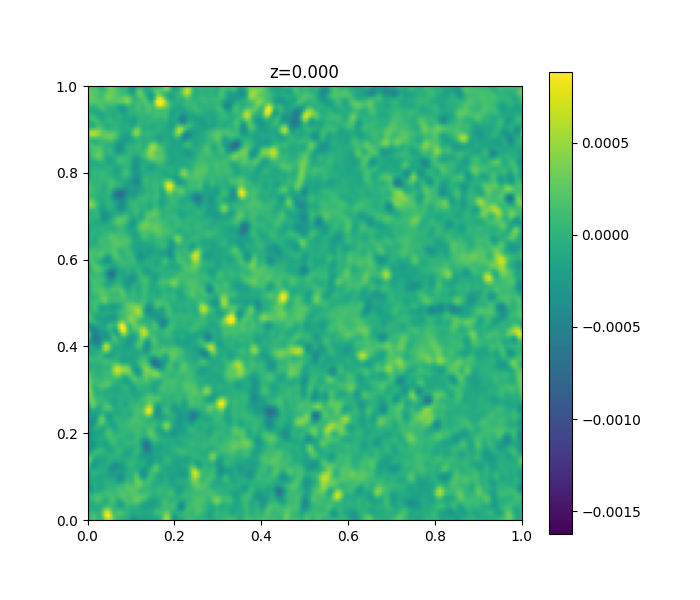

In [57]:
which_data = "k"
which_data = "itTV"
which_data = "TV"
fname = "F_" + which_data
phiname = "PHI_" + which_data
mtz_meteor["sf"] = mtz_meteor.to_structurefactor(fname, phiname)
f_meteor = mtz_meteor.to_reciprocal_grid("sf")
f_meteor[np.isnan(f_meteor)] = 0
rho_meteor = np.fft.ifftn(f_meteor)
_ = slice_3d(rho_meteor.real)


Making sure that I understand the data and a way to find alternative conformations

In [ ]:
from scipy import stats
def make_blurred(frac_pos, grid_shape,radius= .01):
    frac_pos = frac_pos.T
    X, Y, Z = np.mgrid[
        0 : 1 : grid_shape[0] * 1j,
        0 : 1 : grid_shape[1] * 1j,
        0 : 1 : grid_shape[2] * 1j,
    ]
    grid = np.vstack([X.ravel(), Y.ravel(), Z.ravel()])

    kernel = stats.gaussian_kde(frac_pos, radius)
    density = np.reshape(kernel(grid).T, X.shape)
    return density
out = make_blurred(frac_list[occ_mask>0],obj1.shape, radius=0.1)

vv = "mtz_style"
match vv:
    case "normal":
        extent = [0,1,1,0]
        mtz_comp(frac_list,occ_mask, out, extent=extent)
    case "mtz_style":
        extent = [1,0,0,1]
        out = np.flip(out,(0,1,2))
        mtz_comp(frac_list,occ_mask, out[::-1], extent=extent)


curiously the ordering was a bit fidely.

## Angle Approximation Check
Should be lower than 0.25

In [ ]:
np.round(np.sum(np.abs(delta_fa_abs)) / np.sum(np.abs(f_dark)),3)

# Start of the actual analysis

In [ ]:
alpha_xtrs = np.linspace(0,1,20)+1e-10
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=2, noise_level = 0)
corr_x8 = x8_inspired(np.abs(f_dark),np.abs(f_light), np.abs(f_xtrs))

Easier than my above attempt is of course to just calculate the difference of the two phased objects.

In [ ]:
mask_pks_filt = gaussian_filter(np.array(mask_pks,float), 1)>.2
# %matplotlib inline
slice_3d(mask_pks_filt+np.array(mask_pks,float))

In [ ]:
    
alphax = 0.27
alpha_xtrs_vis = np.array([1, alphax*2, alphax, alphax/2,0.19, 0.01])
f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
dens_xtrs, neg_sum = marius(f_xtrs)
    
from plotting3d import show_xtrs
%matplotlib inline
anim = show_xtrs(dens_xtrs, alpha_xtrs_vis, obj0, alpha, version="only", variant=variant, make_gif=False)


In [ ]:
%matplotlib inline
if False:
    for version in ["only", "diff", "diffnorm" , "diffxtr"]:
        anim = show_xtrs(dens_xtrs, alpha_xtrs_vis, obj0, alpha, 
                         version=version, variant=variant, make_gif=True)
        


In [ ]:
def show_hist():
    alphax = 0.27
    alpha_xtrs_vis = np.array([1, alphax*2, 0.3, alphax, alphax/2,alphax/4])
    f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
    dens_xtrs, neg_sum = marius(f_xtrs)
    fig, axs = plt.subplots(2,3, figsize=(8,4),constrained_layout=True)
    ims = []
    for ax, alpha_xtr, arr in zip(axs.flat, alpha_xtrs_vis,dens_xtrs):
        raw = [r"$\alpha_{xtr}$",
               r"$\alpha_t$"]
        tit = f"{raw[0]}: {alpha_xtr:.2f}"
        ax.set_title(tit)
        ax.set_ylim(0,12)
        ax.set_xlim(-1,1)
        bins = np.linspace(np.min(arr), np.max(arr), 30)
        bins = np.linspace(np.min(dens_xtrs), np.max(dens_xtrs), 100)
        arr = arr-obj0
        ax.hist(arr[mask_pks],color="green", alpha=0.7, density=True, bins= bins, label="Areas of Change")
        ax.hist(arr[~mask_pks], color = "blue", alpha=0.7, density=True, bins= bins, label = "Other areas")
        # fig.suptitle(title + f" z={f0}/{imlen-1}", fontsize=16)    
    axs[0,0].legend()
    for ax in [axs[0,0],axs[1,0]]:
        ax.set_ylabel("Value density")
    for ax in axs[1]:
        ax.set_xlabel("Value distribution")
    fig.suptitle("Value Distribution $F_{xtr}$ - Area of Change vs. overall \t"
                 + r"$\alpha_{true}$="+str(alpha))
show_hist()


In [ ]:
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)
dens_xtrs, neg_sum = marius(f_xtrs)
from occupancy import marius_masked


In [ ]:
from scipy import stats
n_largest = 3
n_more = 9
def get_fits(neg_sum, alpha_invs, n_largest):
    m_lowest = alpha_invs>alpha_invs[-n_largest]
    m_biggest = alpha_invs<alpha_invs[n_largest]
    res_lowest = stats.linregress(alpha_invs[m_lowest], -neg_sum[m_lowest])
    res_biggest = stats.linregress(alpha_invs[m_biggest], -neg_sum[m_biggest])
    alpha_line = np.linspace(np.min(alpha_invs), np.max(alpha_invs),5,)
    fit_lowest =  res_lowest.intercept+res_lowest.slope*alpha_line
    fit_biggest =  res_biggest.intercept+res_biggest.slope*alpha_line
    return  alpha_line, fit_lowest, fit_biggest    
alpha_line, fit_biggest1, fit_lowest1 = get_fits(neg_sum, alpha_invs, n_largest)
_         , fit_biggest2, fit_lowest2 = get_fits(neg_sum, alpha_invs, n_more)

fig = plt.figure()
plt.axvline(2/alpha,c="k",linestyle="-.", label="2/alpha_true")
kwargs = {
"linestyle":"--",
"alpha": 0.5,
}
plt.plot(alpha_line, fit_lowest1, **kwargs, c="red",        label=f"Fit (largest {n_largest})")
plt.plot(alpha_line, fit_biggest1,**kwargs, c="darkgreen",  label=f"Fit (smallest {n_largest})")
plt.plot(alpha_line, fit_lowest2, **kwargs, c="orange",     label=f"Fit (smallest {n_more})")
plt.plot(alpha_line, fit_biggest2,**kwargs, c="purple",     label=f"Fit (largest  {n_more})")
plt.plot(alpha_invs,neg_sum*-1, "x",  label="Datapoint")
plt.legend()
print(alpha)
plt.xlabel("2/Alpha")
plt.ylabel(r"$\sum$ |neg. density|")
plt.title("Negative Sum Explosion")
from plotting3d import fname_variant
loc = plotfolder+fname_variant(variant)
fig.savefig(loc + "_negsumexplosion.png")

In [ ]:
# fig = slice_3d(mask_pks_strict_neg, imkwargs={"alpha":.5},)
fig = slice_3d(mask_pks_strict_neg, imkwargs={"alpha":1},)
_ = slice_3d(delta_obj, imkwargs={"cmap":"bwr", "alpha":.99}, fig=fig)


In [ ]:
alpha_invs = (np.arange(0,20)+1e-10)
alpha_xtrs = 2/alpha_invs
f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level = 0)

delta_obj = obj1-obj0
strict = 0.005
mask_pks_strict_abs = gaussian_filter(np.abs(delta_obj),1)>strict
mask_pks_strict_pos = gaussian_filter((delta_obj),1)>strict
mask_pks_strict_neg = gaussian_filter((delta_obj),1)<-strict
mask_pks_strict_neg = ((delta_obj))<-strict
_, neg_sum_msk_neg = marius_masked(f_xtrs, mask_pks_strict_neg)
_, neg_sum_msk_pos = marius_masked(f_xtrs, mask_pks_strict_pos)
alpha_line, fit_biggest1, fit_lowest1 = get_fits(neg_sum_msk, alpha_invs, n_largest)
_         , fit_biggest2, fit_lowest2 = get_fits(neg_sum_msk, alpha_invs, n_more)
fig = plt.figure()
# plt.plot(alpha_invs,neg_sum_msk*-1, "x",  label="Datapoint (masked)")
plt.plot(alpha_invs,neg_sum_msk_neg*-1, "x",  label="Datapoint (masked)")
plt.plot(alpha_invs,neg_sum_msk_pos*-1, "x",  label="Datapoint (masked)")
plt.axvline(2/alpha,c="k",linestyle="-.", label="2/alpha_true")
# plt.plot(alpha_line, fit_lowest1, c="red",linestyle="--", label=f"Fit (largest {n_largest})")
# plt.plot(alpha_line, fit_biggest1, c="darkgreen",linestyle="--",label=f"Fit (smallest {n_largest})")
# plt.plot(alpha_line, fit_lowest2, c="orange",linestyle="--", label=f"Fit (smallest {n_more})")
# plt.plot(alpha_line, fit_biggest2,  c="purple",linestyle="--", label=f"Fit (largest  {n_more})")
plt.legend()
print(alpha)
plt.xlabel("2/Alpha")
plt.ylabel(r"$\sum$ |neg. density|")
plt.title("Negative Sum Explosion (masked)")
from plotting3d import fname_variant
loc = plotfolder+fname_variant(variant)
# fig.savefig(loc + "_negsumexplosion.png")


In [ ]:
2/5.8

In [ ]:
plt.close("all")

interestingly, the results for this are better/more consistent with noise rather than without.

In [ ]:
# slice_3d(np.flip(obj1-obj0,(0,1,2))[32:58, 50:76, 65:90])
intersection = (res_2.intercept-res_1.intercept) / (res_1.slope-res_2.slope)
alpha_intersect = 2/intersection
intersection = (res_2.intercept-res_11.intercept) / (res_11.slope-res_2.slope)
alpha_intersect2 = 2/intersection

alpha_xtrs_vis = np.array([alpha ,alpha_intersect, 0.34])
f_xtrs_vis = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
dens_xtrs, neg_sum = marius(f_xtrs_vis)
print(alpha_xtrs_vis)
plt.close('all')
%matplotlib widget
anim = direct_comp(
    dens_xtrs*mask_pks_strict_neg,
    alpha_xtrs_vis,
    obj0,
    obj1,
    version="only",
    idx=48,
    make_gif=False
) 

In [ ]:
plt.figure()
plt.imshow(dens_xtrs[0,54])
(dens_xtrs[0,54,82,124])

In [ ]:
from occupancy import  x8_density_map_fdiff_norm

alpha_xtrs = np.linspace(5e-2,1,100 )

f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
peak_sum, real_CC = x8_density_map_f1(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum_diff, real_CC_diff = x8_density_map_fdiff(f_xtrs, mask_pks, obj0, delta_obj)
peak_sum_diffnorm, real_CC_diffnorm = x8_density_map_fdiff_norm(f_xtrs, mask_pks, obj0, delta_obj)

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,8),tight_layout=True)
for ax in axs[0] :
    ax.set_ylabel("Ratio prominent over all peaks")
    ax.set_title("Difference Map Method")
    
for ax in axs[:,0] :
    ax.axvline(1/(alpha/2),c="k", linestyle="-", label="alpha_true/2")
    ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[:,1] :
    ax.axvline(alpha/2,c="k", linestyle="-", label="alpha_true/2")
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    
for ax in axs[1] :
    ax.axhline(0,c="k", linewidth=.5, )
    ax.set_ylabel("Cross Correlation")
    ax.set_xlabel("Alphas")
    ax.set_title("Difference Map (CC) Method")

ax = axs[0,0]
ax.plot(1/alpha_xtrs,peak_sum, label=r"F_xtr",color="g")
ax.plot(1/alpha_xtrs,peak_sum_diff, label=r"F_xtr-F0",color="brown")
ax.plot(1/alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")
ax.legend()

ax = axs[0,1]
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{0}$",color="g")
ax.plot(alpha_xtrs,peak_sum_diff, label=r"$\phi_{0}$",color="brown")
ax.plot(alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")

ax = axs[1,0]
ax.plot(1/alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
ax.plot(1/alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(1/alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
ax.set_xlabel("1/occupancy")

ax = axs[1,1]
ax.plot(alpha_xtrs,real_CC,  label=r"F_xtr"    ,    color="g")
ax.plot(alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
ax.set_xlabel("occupancy")

loc = plotfolder+fname_variant(variant)
fig.savefig(loc + "_differencemap.png")

In [ ]:
alpha_xtrs = np.linspace(5e-3,1,150 )

# f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
# peak_sum, real_CC, peak_pos, peak_neg = x8_density_map_f1(f_xtrs, mask_pks, obj0, delta_obj, posneg=True)
# # peak_sum_diffnorm, real_CC_diffnorm, fract = x8_density_map_fdiff_norm(f_xtrs, mask_pks, obj0, delta_obj, inspect=True)
# peak_sum_diffnorm, real_CC_diffnorm, peak_pos_diffnorm, peak_neg_diffnorm = x8_density_map_fdiff_norm(f_xtrs, mask_pks, obj0, delta_obj, posneg=True)

# peak_sum_difffact, real_CC_difffact = x8_density_map_fdiff_factor(f_xtrs/alpha_xtrs[:,None,None], mask_pks, obj0, delta_obj, 1)
# peak_sum_diff_noisyf0, real_CC_diff_noisyf0 = x8_density_map_fdiff_noisyf0(f_xtrs, mask_pks, obj0, delta_obj)

#print(np.max(),axis=(1,2)))

pk_val = alpha_xtrs[np.argmax(peak_sum_diffnorm)]

fig, axs = plt.subplots(2,2, figsize=(8,8),tight_layout=True)
for ax in axs[0] :
    ax.set_ylabel("Ratio prominent over all peaks")
    ax.set_title("Difference Map Method")
    
for ax in axs[:,0] :
    # ax.axvline(1/(alpha/2),c="k", linestyle="-", label="alpha_true/2")
    ax.axvline(1/alpha,c="k", linestyle="-.", label="alpha_true")
    # ax.axvline(1/(alpha*2),c="k", linestyle="--", label="2*alpha_true")
    ax.axvline(1/pk_val,c="orange", linestyle="--", label="previous_peak")
    ax.set_xlim(0,30)
    
for ax in axs[:,1] :
    # ax.axvline(alpha/2,c="k", linestyle="-", label="alpha_true")
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    # ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    ax.axvline(pk_val,c="orange", linestyle="--", )
    ax.set_xlim(0,0.5)
    
for ax in axs[1] :
    ax.axhline(0,c="k", linewidth=.5, )
    ax.set_ylabel("Cross Correlation")
    ax.set_xlabel("Alphas")
    ax.set_title("Difference Map (CC) Method")

ax = axs[0,0]
ax.plot(1/alpha_xtrs,peak_sum, label=r"F_xtr",color="g")
ax.plot(1/alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")
ax.plot(1/alpha_xtrs,peak_pos, label=r"F_xtr:pos",color="red")
ax.plot(1/alpha_xtrs,peak_neg, label=r"F_xtr:posneg",color="darkgreen")
ax.plot(1/alpha_xtrs,peak_pos_diffnorm, label=r"F_xtr:pos",color="red")
ax.plot(1/alpha_xtrs,peak_neg_diffnorm, label=r"F_xtr:posneg",color="darkgreen")
# ax.plot(1/alpha_xtrs,peak_sum_diff_noisyf0, label=r"norm(F_xtr)-norm(F0)",color="r")
# ax.plot(1/alpha_xtrs,peak_sum_difffact, label=r"norm(F_xtr)-norm(F0)",color="cyan")
ax.legend()

ax = axs[0,1]
ax.plot(alpha_xtrs,peak_sum, label=r"$\phi_{0}$",color="g")
# ax.plot(alpha_xtrs,peak_sum_diff, label=r"$\phi_{0}$",color="brown")
ax.plot(alpha_xtrs,peak_sum_diffnorm, label=r"norm(F_xtr)-norm(F0)",color="b")
ax.plot(alpha_xtrs,peak_pos, label=r"F_xtr:pos",color="red")
ax.plot(alpha_xtrs,peak_neg, label=r"F_xtr:posneg",color="darkgreen")
ax.plot(alpha_xtrs,peak_pos_diffnorm, label=r"F_xtr:pos",color="red")
ax.plot(alpha_xtrs,peak_neg_diffnorm, label=r"F_xtr:posneg",color="darkgreen")
# ax.plot(alpha_xtrs,peak_sum_diff_noisyf0, label=r"norm(F_xtr)-norm(F0)",color="r")
# ax.plot(alpha_xtrs,peak_sum_difffact, label=r"norm(F_xtr)-norm(F0)",color="cyan")

ax = axs[1,0]
ax.plot(1/alpha_xtrs,real_CC, label=r"$\phi_{0}$",color="g")
# ax.plot(1/alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(1/alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
# ax.plot(1/alpha_xtrs,real_CC_diff_noisyf0, label=r"norm: F_xtr-F0",color="r")
# ax.plot(1/alpha_xtrs,real_CC_difffact, label=r"norm: F_xtr-F0",color="cyan")
ax.set_xlabel("1/occupancy")

ax = axs[1,1]
ax.plot(alpha_xtrs,real_CC,  label=r"F_xtr"    ,    color="g")
# ax.plot(alpha_xtrs,real_CC_diff, label=r"F_xtr-F0",color="brown")
ax.plot(alpha_xtrs,real_CC_diffnorm, label=r"norm: F_xtr-F0",color="b")
# ax.plot(alpha_xtrs,real_CC_diff_noisyf0, label=r"norm: F_xtr-F0",color="r")
# ax.plot(alpha_xtrs,real_CC_difffact, label=r"norm: F_xtr-F0",color="cyan")
ax.set_xlabel("occupancy")


I think I said quite a bit about it in the previous text. Here I don't have much to add.

In [ ]:
pk_val = alpha_xtrs[np.argmax(peak_sum_diffnorm)]
pk_val

alpha_xtrs_vis = np.array([alpha,pk_val])
f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
dens_xtrs, neg_sum = marius(f_xtrs)

direct_comp(
    dens_xtrs,
    alpha_xtrs_vis,
    obj0,
    obj1,
    version="diffxtr",
    variant=variant,
    # make_gif=True,
    idx=48,
) 


In [ ]:
delta_obj = obj1-obj0
strict = 0.02
lax = 0.005
mask_pks = gaussian_filter(np.abs(delta_obj),1)>0.01
mask_pks_strict = gaussian_filter(np.abs(delta_obj),1)>strict
mask_pks_lax = gaussian_filter(np.abs(delta_obj),1)>lax
mask_pks_filt = gaussian_filter(np.array(mask_pks,float), 1)>.9
mask_pks = np.abs(delta_obj)>0.06
# slice_3d(delta_obj, cmap='bwr',vmin=-np.max(delta_obj), vmax=np.max(delta_obj))
slice_3d(mask_pks_strict)
# ([delta_obj,mask_pks_filt],rows=1, cols=2)


In [ ]:
bins = np.logspace(-6,0,100)
bins = np.concatenate([[0], bins])
plt.figure()
plt.hist(delta_obj.flatten(),bins=bins)
plt.axvline(strict, label="narrow", color="r")
plt.axvline(lax, label="wide", color='g')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Value Distribution $\Delta \rho$")
plt.ylabel("Frequency")

In [ ]:
alpha_xtrs = np.linspace(5e-2,1,50 )

f_xtrs = make_f_xtr(alpha_xtrs, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
mean_local_strict, mean_global_strict = pandda(f_dark, f_xtrs, mask_pks)
mean_local_lax, mean_global_lax = pandda(f_dark, f_xtrs, mask_pks_lax)


In [ ]:
mean_local, mean_global =  mean_local_strict, mean_global_strict
# mean_local, mean_global =  mean_local_lax, mean_global_lax
ml = [mean_local_strict, mean_local_lax]
mg = [mean_global_strict, mean_global_lax]
titles = ["narrow mask", "wide mask"]

fig, axso = plt.subplots(3,2)
for axs, mean_local, mean_global, title in zip(axso.T, ml, mg, titles):
    ax = axs[0]
    ax.set_title(title)
    ax.axvline(alpha,c="k", linestyle="-.", )
    ax.plot(alpha_xtrs,+mean_global-mean_local, label="global-local") 
    ax.legend()
    ax = axs[1]
    ax.axvline(alpha,c="k", linestyle="-.", )
    ax.axhline(0,c="k", linestyle="--")
    ax.plot(alpha_xtrs,mean_local, label="local") 
    ax.plot(alpha_xtrs, mean_global,label="global")
    ax.legend()
    ax = axs[2]
    # ax.axvline(alpha/2,c="k", linestyle="-", label="1/2*alpha_true")
    ax.axvline(alpha,c="k", linestyle="-.", label="alpha_true")
    # ax.axvline(alpha*2,c="k", linestyle="--", label="2*alpha_true")
    ax.plot(alpha_xtrs,+np.gradient(mean_global-mean_local), label="global-local") 
    ax.legend()

fig.suptitle("PanDDA method")
loc = plotfolder+fname_variant(variant)
fig.savefig(loc + "_pandda.png")

Here, too, results look better for the case of noise. Weird. That is assuming one knows the most crucial regions of change.

Also, here it is far from 0 correlation at the correct occupancy. This makes the underlying assumption motivation seam rather brittle.

In [ ]:
pk_strict = alpha_xtrs[np.argmax(mean_global_strict-mean_local_strict)]
pk_lax = alpha_xtrs[np.argmax(mean_global_lax-mean_local_lax)]

alpha_xtrs_vis = np.array([alpha,pk_lax, pk_strict])
f_xtrs = make_f_xtr(alpha_xtrs_vis, f_dark, f_light, np.angle(f_dark),  version=1, noise_level=0)
dens_xtrs, neg_sum = marius(f_xtrs)

direct_comp(
    dens_xtrs,
    alpha_xtrs_vis,
    obj0,
    obj1,
    version="only",
    variant=variant,
    idx=48,
    make_gif = False
) 
